In [1]:
# importing necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve, auc
from sklearn.model_selection import cross_val_score,StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# load dataset

data = pd.read_csv('heart.csv')

In [3]:
# Selecting features

selector = SelectKBest(chi2,k= 10)
X = data.drop(columns=['target'])
y = data['target']

X_new  = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca'],
      dtype='object')


In [4]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\ndjek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ndjek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

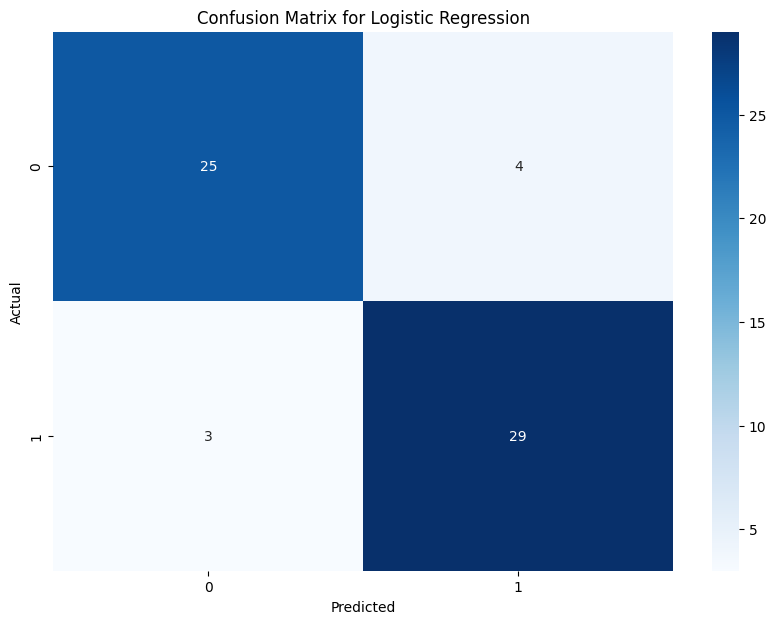

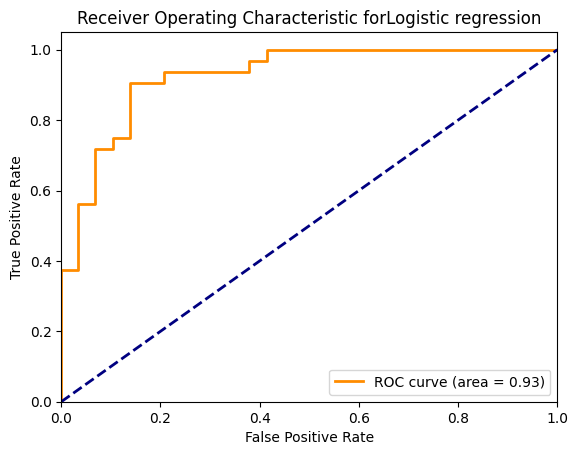

Cross-validation scores:  [0.90163934 0.85245902 0.7704918  0.81666667 0.86666667]
Mean cross-validation score:  0.8415846994535517
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308


In [5]:
# Cross validation

# Train and evaluate

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Define the models

log_regre = LogisticRegression(max_iter=1000)
rand_for = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True, random_state=42,kernel='linear')
knn = KNeighborsClassifier()
dtree = DecisionTreeClassifier()

# Train and evaluate each model
# Logistic regression
results = {}
log_regre.fit(X_train, y_train)
y_pred = log_regre.predict(X_test)
    # Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(log_regre, X, y, cv=cv,scoring='accuracy')  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = log_regre.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Logistic Regression'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)



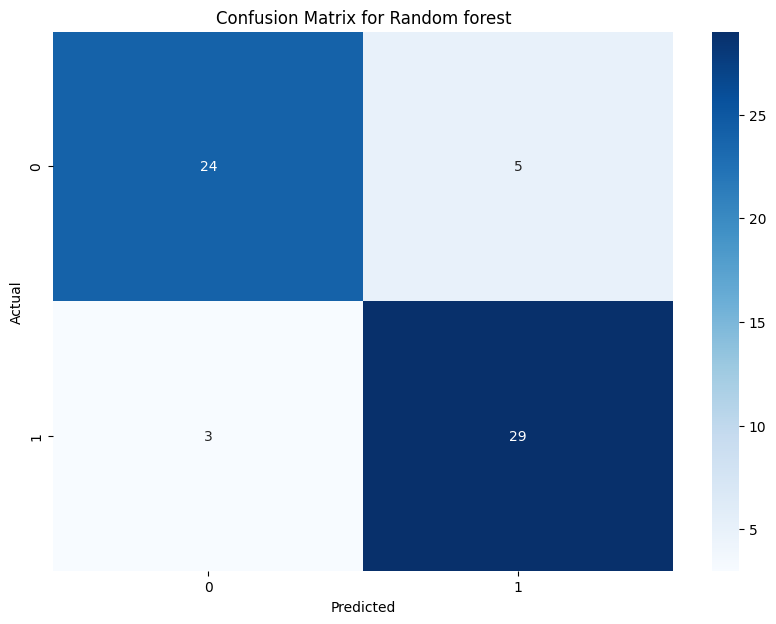

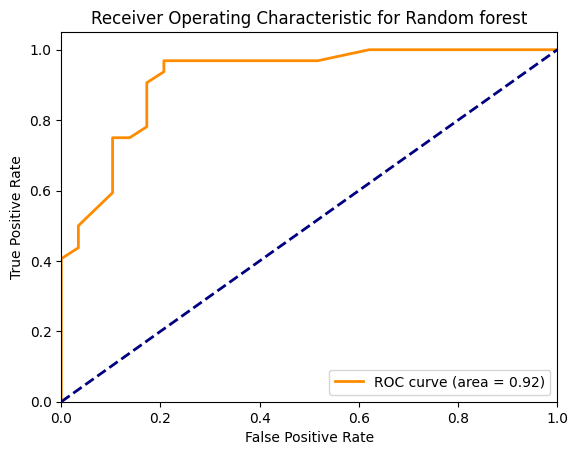

Cross-validation scores:  [0.83606557 0.8852459  0.83606557 0.8        0.76666667]
Mean cross-validation score:  0.8248087431693989
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.868852   0.852941  0.90625  0.878788


In [6]:
# Random forest 
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(rand_for, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Random forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = rand_for.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic for Random forest')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Random Forest'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

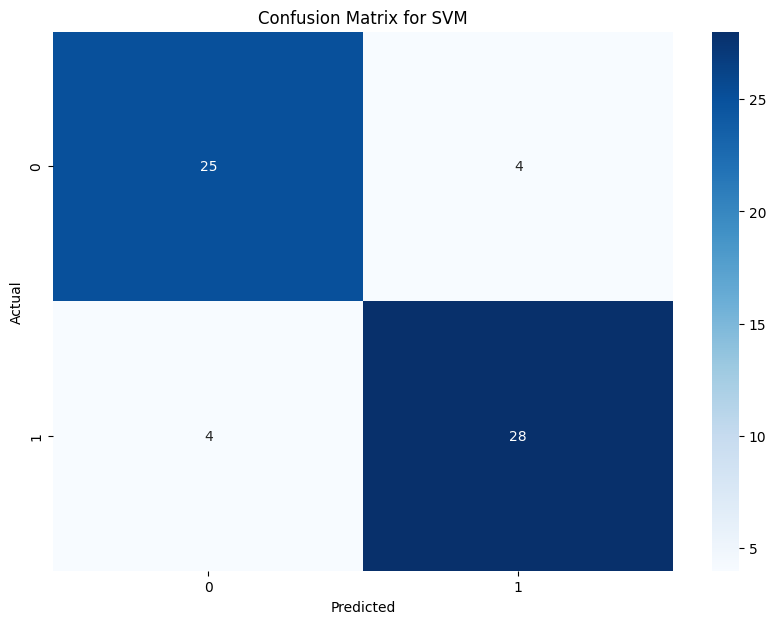

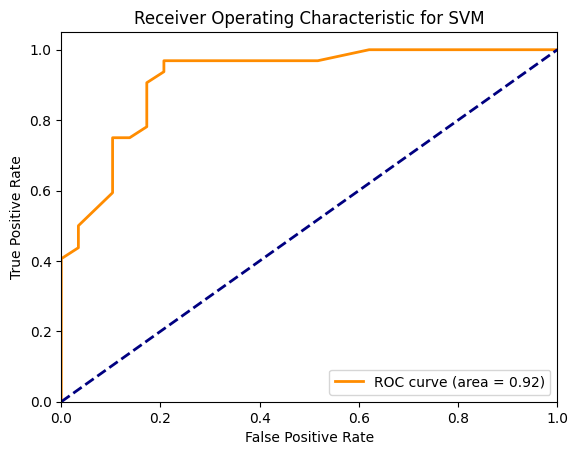

Cross-validation scores:  [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Mean cross-validation score:  0.8283060109289618
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.868852   0.852941  0.90625  0.878788
SVM                  0.868852   0.875000  0.87500  0.875000


In [7]:
# Support vector machine

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(svm, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

      

        # AUC-ROC
y_pred_prob = rand_for.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show() 
# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['SVM'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

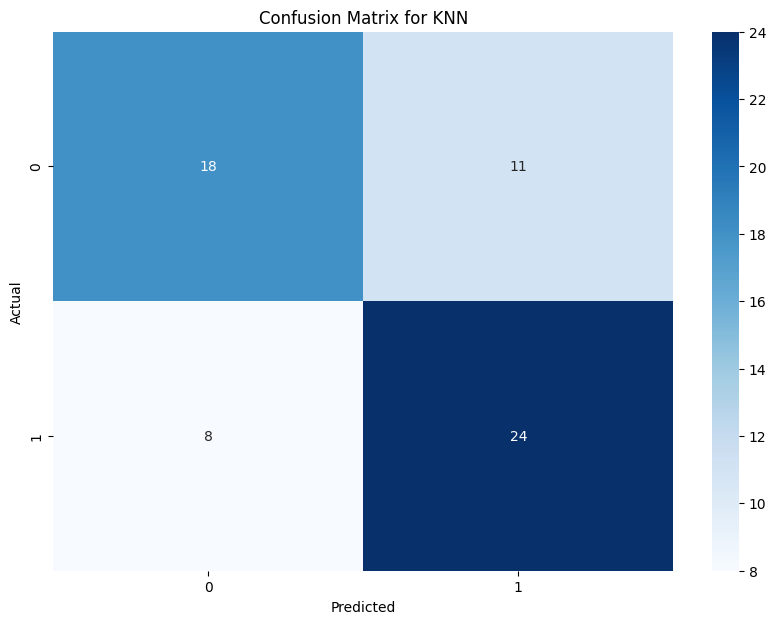

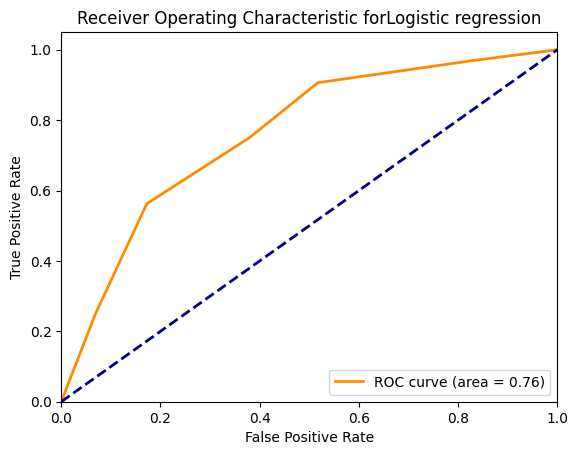

Cross-validation scores:  [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Mean cross-validation score:  0.643879781420765
                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.868852   0.852941  0.90625  0.878788
SVM                  0.868852   0.875000  0.87500  0.875000
KNN                  0.688525   0.685714  0.75000  0.716418


In [8]:
# KNN
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = knn.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['KNN'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# tree.plot_tree(models['dtree'], feature_names=data.drop(columns=['target']))
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

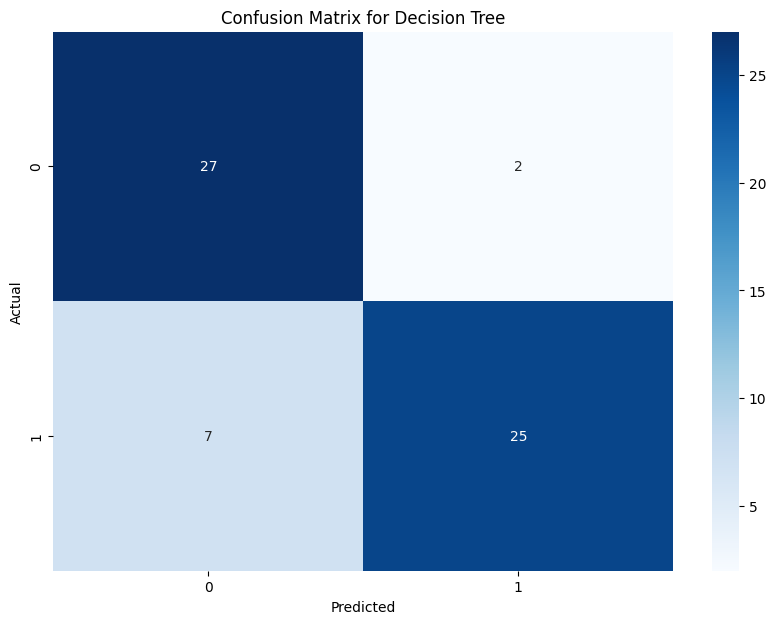

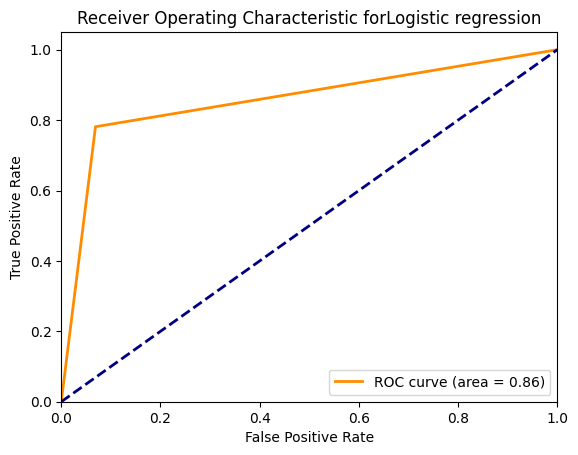

Cross-validation scores:  [0.73770492 0.86885246 0.7704918  0.7        0.71666667]
Mean cross-validation score:  0.7587431693989071


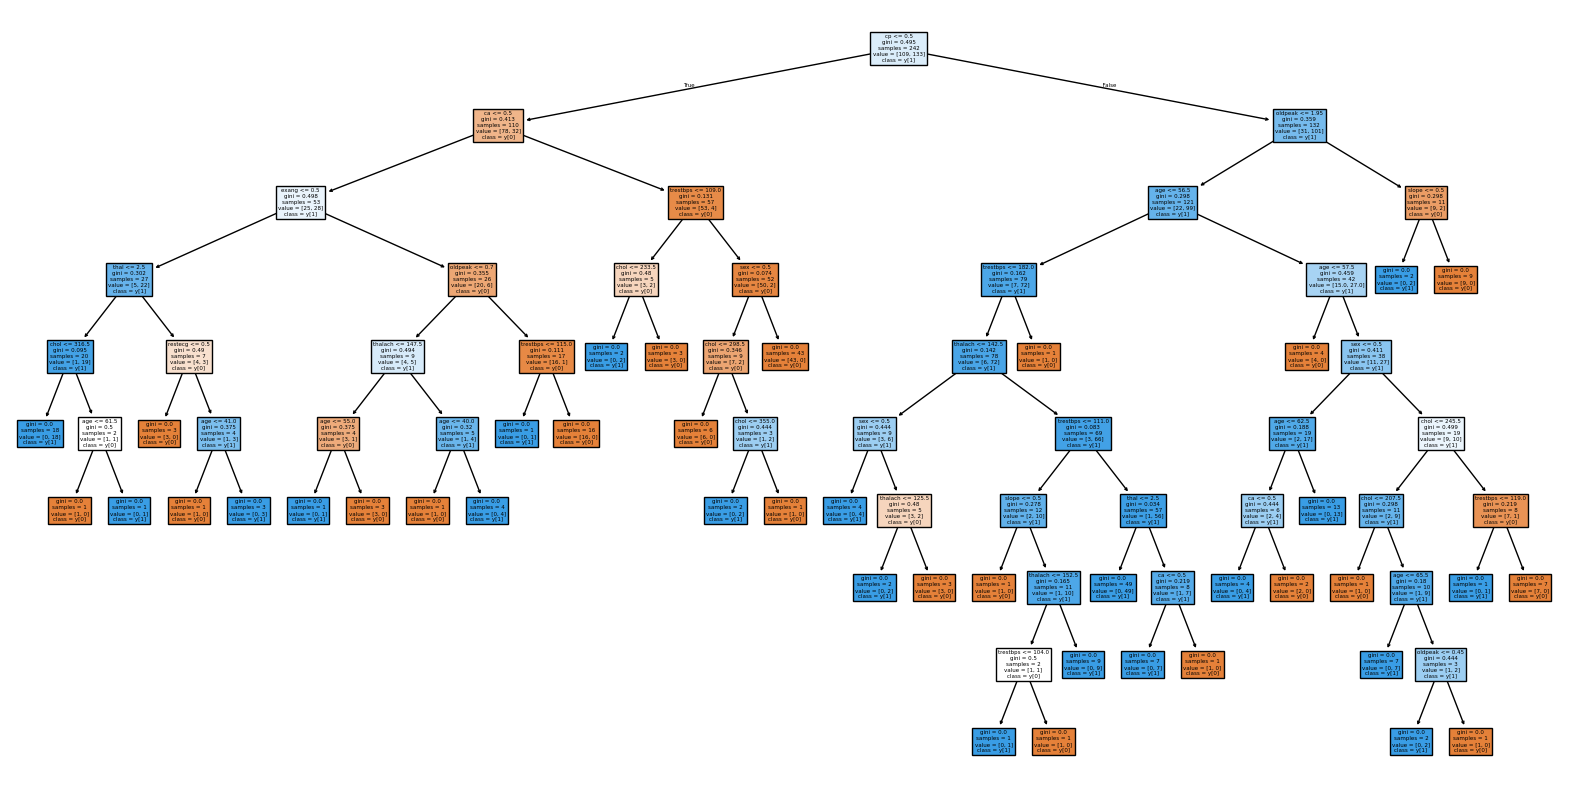

                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.868852   0.852941  0.90625  0.878788
SVM                  0.868852   0.875000  0.87500  0.875000
KNN                  0.688525   0.685714  0.75000  0.716418
Decision tree        0.852459   0.925926  0.78125  0.847458


In [9]:
# Decision tree
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
    # Perform cross-validation
scores = cross_val_score(dtree, X, y, cv=5)  # 5-fold cross-validation

    # confusion matric
      # Confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

   
        # AUC-ROC
y_pred_prob = dtree.predict_proba(X_test)[:, 1]
        # Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        # Calculate AUC
roc_auc = auc(fpr, tpr)
        # Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic forLogistic regression')
plt.legend(loc="lower right")
plt.show()        

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())
    

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
results['Decision tree'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }
# Plot the decision tree
plt.figure(figsize=(20,10))  # Adjust size as needed
plot_tree(dtree, feature_names=X.columns, class_names=True, filled=True)
plt.show()
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

In [10]:
# Actionable insight
"""

                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.885246   0.878788  0.90625  0.892308
Random Forest        0.868852   0.852941  0.90625  0.878788
SVM                  0.868852   0.875000  0.87500  0.875000
KNN                  0.688525   0.685714  0.75000  0.716418
Decision tree        0.852459   0.925926  0.78125  0.847458

Logistic regression
Best performing module: 
 Logistic Regression has the highest accuracy and a strong balance 
 between precision and recall, resulting in the highest F1 score. 
 This indicates it is the most balanced model for this classification task, 
 performing well in both correctly identifying 
 positive cases (recall) and ensuring that identified positive cases are truly positive (precision)

Support Vector Machine
SVM has consistent performance across all metrics 
with identical precision and recall, resulting in a balanced F1 score. 
Its accuracy is similar to that of Random Forest, 
suggesting it is a reliable model for this classification problem.

Random forst
Random Forest also performs well with high recall and decent precision, 
leading to a strong F1 score. While its accuracy and F1 score are slightly lower than Logistic Regression, 
it still performs well and may offer advantages in handling non-linear relationships in the data.

Decision Tree
which excels in ensuring that predicted positive cases are truly positive, 
though it sacrifices some recall.

KNN
KNN has the lowest performance among all models. Its accuracy, precision, 
and F1 score are significantly lower, indicating it is not as effective for this dataset. 
The higher recall compared to precision suggests 
it identifies positive cases but also has a higher rate of false positives.
"""







# conclusion
#  Logistic Regression is recommended as the primary model, with Random Forest and SVM as strong alternatives.

# Recommendation
# Model considered for deployement: Logistic regression
# Future tunning of model
# Ensemble mrthod, 